In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [8]:
def thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w):
    α_s = 1 - r_s * (1 - α_m)
    α_i = 1 - r_i * (1 - α_m)
    ψ_w = 1 - w * (1 - ψ)
    γ_p = 1 - p * (1 - γ)
    
    if α == 2:
        mean_a = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a = (1 - α) * (1 - eps**(2 - α)) / ((2 - α) * (1 - eps**(1 - α)))
    
    if α == 3:
        mean_a2 = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a2 = (1 - α) * (1 - eps**(3 - α)) / ((3 - α) * (1 - eps**(1 - α)))
    
    λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)
    return λ_t, mean_a

In [9]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

ef = np.linspace(0.01, 1, 100)
vi = np.linspace(0.01, 1, 100)
iErri = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        iErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, vis, effi, 1, 0, 0, 0, 0, 0, 0)[0]
print(iErri)
iErri_n = np.copy(iErri)
iErri_n[iErri_n<1] = np.nan

[[2.9997 2.9994 2.9991 ... 2.9706 2.9703 2.97  ]
 [2.9994 2.9988 2.9982 ... 2.9412 2.9406 2.94  ]
 [2.9991 2.9982 2.9973 ... 2.9118 2.9109 2.91  ]
 ...
 [2.9706 2.9412 2.9118 ... 0.1188 0.0894 0.06  ]
 [2.9703 2.9406 2.9109 ... 0.0894 0.0597 0.03  ]
 [2.97   2.94   2.91   ... 0.06   0.03   0.    ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_17304/3566731398.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)


In [13]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.2 * lam_t

ef = np.linspace(0.01, 1, 100)
vi = np.linspace(0.01, 1, 100)
iErri2 = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        iErri2[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, vis, effi, 1, 0, 0, 0, 0, 0, 0)[0]
print(iErri2)
iErri2_n = np.copy(iErri2)
iErri2_n[iErri2_n<1] = np.nan

[[1.19988 1.19976 1.19964 ... 1.18824 1.18812 1.188  ]
 [1.19976 1.19952 1.19928 ... 1.17648 1.17624 1.176  ]
 [1.19964 1.19928 1.19892 ... 1.16472 1.16436 1.164  ]
 ...
 [1.18824 1.17648 1.16472 ... 0.04752 0.03576 0.024  ]
 [1.18812 1.17624 1.16436 ... 0.03576 0.02388 0.012  ]
 [1.188   1.176   1.164   ... 0.024   0.012   0.     ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_17304/3566731398.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)


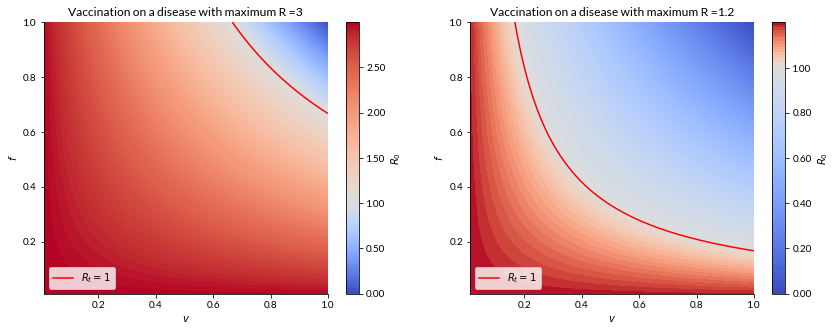

In [14]:
def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(iErri.min(), iErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(ef, vi, iErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(ef, vi, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_t = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$v$")
ax[0].set_ylabel(r"$f$")
ax[0].set_title("Vaccination on a disease with maximum R =3")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[0].set_ylim(ef.min(), vi.max())  # Set y-axis limits


contour_levels2 = np.linspace(iErri2.min(), iErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(ef, vi, iErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour = ax[1].contour(ef, vi, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.2))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.2))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_t = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$v$")
ax[1].set_ylabel(r"$f$")
ax[1].set_title("Vaccination on a disease with maximum R =1.2")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[1].set_ylim(ef.min(), vi.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_vax_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 


# Show the plot
plt.show()

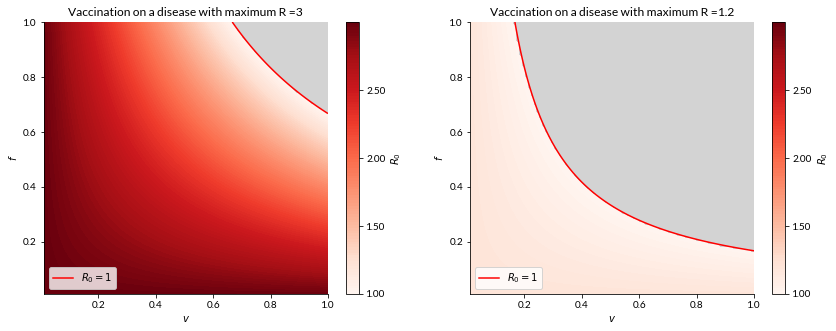

In [19]:
def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(1, np.nanmax(iErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax= np.nanmax(iErri_n)
plot_surface = ax[0].contourf(ef, vi, iErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(ef, vi, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$v$")
ax[0].set_ylabel(r"$f$")
ax[0].set_title("Vaccination on a disease with maximum R =3")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[0].set_ylim(ef.min(), vi.max())  # Set y-axis limits


#contour_levels2 = np.linspace(1, np.nanmax(iErri2_n), 100)
ax[1].set_facecolor("lightgrey")
vmax2= np.nanmax(iErri2_n)

plot_surface = ax[1].contourf(ef, vi, iErri2_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[1].contour(ef, vi, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(1, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(1, vmax + 1, 0.5))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$v$")
ax[1].set_ylabel(r"$f$")
ax[1].set_title("Vaccination on a disease with maximum R =1.2")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[1].set_ylim(ef.min(), vi.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_vax_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 


# Show the plot
plt.show()

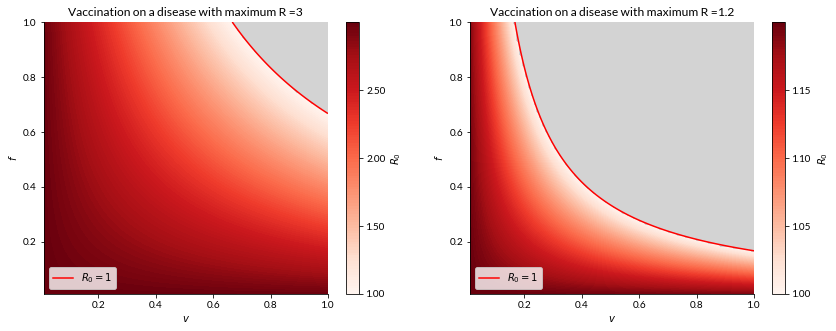

In [20]:
def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(1, np.nanmax(iErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax= np.nanmax(iErri_n)
plot_surface = ax[0].contourf(ef, vi, iErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(ef, vi, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$v$")
ax[0].set_ylabel(r"$f$")
ax[0].set_title("Vaccination on a disease with maximum R =3")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[0].set_ylim(ef.min(), vi.max())  # Set y-axis limits


contour_levels2 = np.linspace(1, np.nanmax(iErri2_n), 100)
ax[1].set_facecolor("lightgrey")
vmax2= np.nanmax(iErri2_n)

plot_surface = ax[1].contourf(ef, vi, iErri2_n, cmap="Reds", levels = contour_levels2)

# Plot contour lines
contour = ax[1].contour(ef, vi, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(1, vmax + 1, 0.05))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(1, vmax + 1, 0.05))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$v$")
ax[1].set_ylabel(r"$f$")
ax[1].set_title("Vaccination on a disease with maximum R =1.2")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[1].set_ylim(ef.min(), vi.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_vax_phase_space1.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 


# Show the plot
plt.show()